In [1]:
import csv
import base64
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

path = "/home/zxy/codes/working/ICLBoom/VLMEvalKit/LMUData/"
path = "./datasets/chess/"
# datasets_name = "Open_MI.tsv"
datasets_name = "CHESS_SQ.tsv"
datasets_name = "query_SI_retrieved.tsv"
# datasets_name = "query_retrieved.tsv"

with open(path + datasets_name, "r", encoding="utf-8") as tsvfile:
    # 创建一个csv.reader对象，指定制表符为字段分隔符
    tsvreader = csv.reader(tsvfile, delimiter="\t")

    # 读取第一行（标题行）
    headers = next(tsvreader)
    print("Headers:", headers)

Headers: ['index', 'question', 'answer', 'image', 'support']


index : chess_00000007
question : what is it?
answer : Rook


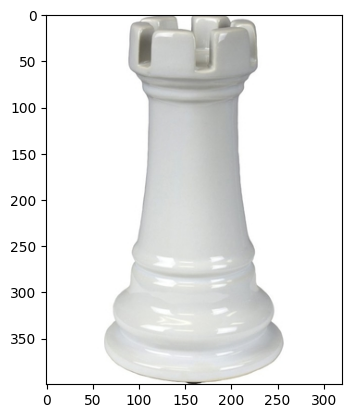

support
{'index': 'chess_00000106', 'question': 'what is it?', 'answer': 'King', 'image': '/9j/4AAQSkZJRgABAgEASABIAAD/4QqlRXhpZgAATU0AKgAAAAgACgEPAAIAAAASAAAAhgEQAAIAAAAKAAAAmAESAAMAAAABAAEAAAEaAAUAAAABAAAAogEbAAUAAAABAAAAqgEoAAMAAAABAAIAAAExAAIAAAAbAAAAsgEyAAIAAAAUAAAAzQITAAMAAAABAAIAAIdpAAQAAAABAAAA5AAAA3ROSUtPTiBDT1JQT1JBVElPTgBOSUtPTiBEODAAAAAASAAAAAEAAABIAAAAAUFkb2JlIFBob3Rvc2hvcCBDUyBXaW5kb3dzADIwMTE6MDE6MTkgMTE6Mjg6MzUAAAAAACeCmgAFAAAAAQAAAr6CnQAFAAAAAQAAAsaIIgADAAAAAQABAACIJwADAAAAAQKAAACQAAAHAAAABDAyMjGQAwACAAAAFAAAAs6QBAACAAAAFAAAAuKRAQAHAAAABAECAwCRAgAFAAAAAQAAAvaSBAAKAAAAAQAAAv6SBQAFAAAAAQAAAwaSBwADAAAAAQAFAACSCAADAAAAAQADAACSCQADAAAAAQAAAACSCgAFAAAAAQAAAw6ShgAHAAAALAAAAxaSkAACAAAAAzUwAACSkQACAAAAAzUwAACSkgACAAAAAzUwAACgAAAHAAAABDAxMDCgAQADAAAAAQABAACgAgAEAAAAAQAAAcKgAwAEAAAAAQAAAcKgBQAEAAAAAQAAA1SiFwADAAAAAQACAACjAAAHAAAAAQMAAACjAQAHAAAAAQEAAACjAgAHAAAACAAAA0KkAQADAAAAAQAAAACkAgADAAAAAQABAACkAwADAAAAAQABAACkBAAFAAAAAQAAA0qkBQADAAAAAQBLAACkBgADAAAAAQAAAACkBwADAAAAAQABAACkC

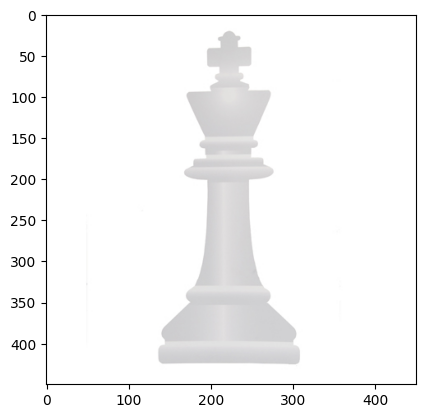

{'index': 'chess_00000040', 'question': 'what is it?', 'answer': 'Queen', 'image': '/9j/4AAQSkZJRgABAQEASABIAAD/2wCEAAQEBAQEBAUFBQUHBwYHBwoJCAgJCg8KCwoLCg8WDhAODhAOFhQYExITGBQjHBgYHCMpIiAiKTEsLDE+Oz5RUW0BBAQEBAQEBQUFBQcHBgcHCgkICAkKDwoLCgsKDxYOEA4OEA4WFBgTEhMYFCMcGBgcIykiICIpMSwsMT47PlFRbf/CABEIAyAFyAMBEQACEQEDEQH/xAAcAAEAAgMBAQEAAAAAAAAAAAAABAUCAwYHAQj/2gAIAQEAAAAA/dwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAUtBr7SSAAAAAAAAAAAAAAAAAAAAAAAAAAAAACNwlJyXR+0gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAreB5Phrb9PgAAAAAAAAAAAAAAAAAAAAAAAAAAAAA+eR+d8d+jvRAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAg8fwdPX913XV5gAAAAAAAAAAAAAAAAAAAAAAAAAAAAOe5aJlpjpErvrEAAAAAAAAAAAAAAAAAAAAAAAAAAAAVsyi5jTJz1QK7R8neqxpcwAAAAAAAAAAAAAAAAAAAAAAAAAAAEbzzP5o2bNMKug5V8O6jX3swAAAAAAAAAAAAAAAAAAAAAAAAAABB4Ww6ThI+/OThSxK+BDh1dp0PY9LwE314AAAAAAAAAAAAAAAAAAAAAAAAA

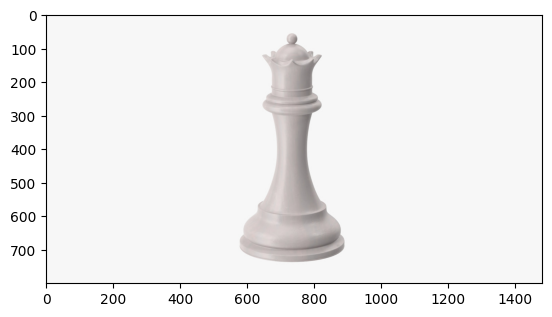

{'index': 'chess_00000017', 'question': 'what is it?', 'answer': 'Pawn', 'image': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUDBAQEAwUEBAQFBQUGBwwIBwcHBw8LCwkMEQ8SEhEPERETFhwXExQaFRERGCEYGh0dHx8fExciJCIeJBweHx7/2wBDAQUFBQcGBw4ICA4eFBEUHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh7/wAARCALuAqYDASIAAhEBAxEB/8QAHQABAAEFAQEBAAAAAAAAAAAAAAQCAwUGBwEICf/EAFYQAAEDAQMHBgkGCwUHBAMBAAABAgMEBQYRBxITITFBYTZRcXSxshQiMjVzgZGh0QgVQlKCwSMzQ1NUYnKDkpPSFkSEouEkNGNko8LwJUVl4heUs/H/xAAcAQEAAgMBAQEAAAAAAAAAAAAAAgMEBQYBBwj/xAA7EQEAAgECAwMJBwQBBQEBAAAAAQIDBBEFITESQVEGE2FxgZGhsdEUIjJCweHwByNS8UMVJDNyklOi/9oADAMBAAIRAxEAPwD7LBDbaNO9qPYypc1UxRUp3qip7D3w+PdBVr/h3/ACWCJ4am6lq1/dYdoWtfuoatfstTtUCWCIlZMuyzqv/J/UPCqjdZ1T/FH/AFASwQ/CqrdZs/8AHH/Ue+EVi7KB6dMrfiBLBE01cuyib65k+B5pbR/Q4E6ahf6QJgImfaP6LTf/ALC/0HmdaX5ikT9+7+kCYCGi2ku2OkT945fuPcLSXfSp6nKBLBDzLS/PUifunL/3HujtH9JpU/cO/rAlgiaK0P0unT/Dr/WeaG0N9bD6qf8A+wEwETwes31yeqFPiPBapf8A3GVOiNnwAlgiJSVG+0qj+CP+keCTb7RqvZH/AEgSwQ/ApN9oVf8Ak/pPfAl31tWv20TsQCWMSJ4C1

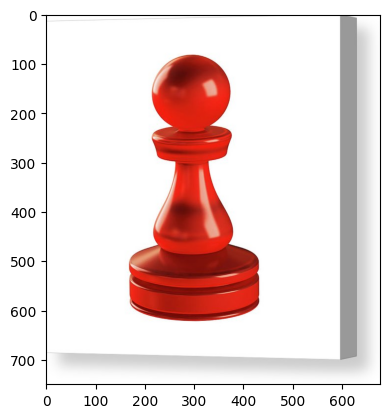

{'index': 'chess_00000021', 'question': 'what is it?', 'answer': 'King', 'image': '/9j/4AAQSkZJRgABAQEASABIAAD/7QA4UGhvdG9zaG9wIDMuMAA4QklNBAQAAAAAAAA4QklNBCUAAAAAABDUHYzZjwCyBOmACZjs+EJ+/9sAQwAIBgYHBgUIBwcHCQkICgwUDQwLCwwZEhMPFB0aHx4dGhwcICQuJyAiLCMcHCg3KSwwMTQ0NB8nOT04MjwuMzQy/9sAQwEJCQkMCwwYDQ0YMiEcITIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIy/8AAEQgCWAJYAwEiAAIRAQMRAf/EABwAAQABBQEBAAAAAAAAAAAAAAABAwQFBgcCCP/EAEcQAQACAQMBBQQFCQUHAwUBAAABAgMEBREhBhITMUEHUWFxIjKBkaEUIzNCUmJyscEVJHOC0RYlNDVDU5JEY+FFVYOistL/xAAXAQEBAQEAAAAAAAAAAAAAAAAAAQID/8QAGhEBAQEBAQEBAAAAAAAAAAAAAAERAjEhQf/aAAwDAQACEQMRAD8A7+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAByANK7T+1Ls52W1dtFqM2XU6yn18OmrFppPutMzERPw81Ps17V+zfaTV00ePJm0mqvPFMeprFYvPui0TMc/CeAbyAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA1ftb200/ZalazpMuqz2p34pW0Visc8RMzPvnnyifJtDUu3XZTD2j2+t628HWYYmMWoiOYjn9W8etJ9fd5wDm+5e2Pf8ANFo0mm0Ojr6T3bZbffMxH4Na1ftI7W6rnvb3qKRP/arSn8oYfddDqNBrM2k1eG2DU4Z4y4pnnu+6Yn9as+ksPmycW

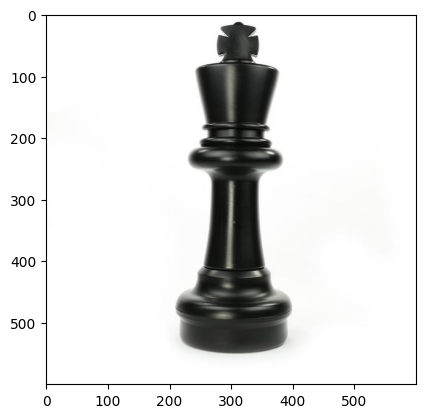

{'index': 'chess_00000086', 'question': 'what is it?', 'answer': 'King', 'image': '/9j/4AAQSkZJRgABAQEASABIAAD/7S8YUGhvdG9zaG9wIDMuMAA4QklNBAQAAAAAAEEcAVoAAxslRxwBWgADGyVHHAIAAAIABBwCNwAIMjAxMzA1MTQcAjwACzAwMDAwMCswMDAwHAI+AAgyMDEzMDUxNAA4QklNBCUAAAAAABBwiE016tKyUtrsyJNAjnUIOEJJTQPqAAAAABggPD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0iVVRGLTgiPz4KPCFET0NUWVBFIHBsaXN0IFBVQkxJQyAiLS8vQXBwbGUvL0RURCBQTElTVCAxLjAvL0VOIiAiaHR0cDovL3d3dy5hcHBsZS5jb20vRFREcy9Qcm9wZXJ0eUxpc3QtMS4wLmR0ZCI+CjxwbGlzdCB2ZXJzaW9uPSIxLjAiPgo8ZGljdD4KCTxrZXk+Y29tLmFwcGxlLnByaW50LlBhZ2VGb3JtYXQuUE1Ib3Jpem9udGFsUmVzPC9rZXk+Cgk8ZGljdD4KCQk8a2V5PmNvbS5hcHBsZS5wcmludC50aWNrZXQuY3JlYXRvcjwva2V5PgoJCTxzdHJpbmc+Y29tLmFwcGxlLmpvYnRpY2tldDwvc3RyaW5nPgoJCTxrZXk+Y29tLmFwcGxlLnByaW50LnRpY2tldC5pdGVtQXJyYXk8L2tleT4KCQk8YXJyYXk+CgkJCTxkaWN0PgoJCQkJPGtleT5jb20uYXBwbGUucHJpbnQuUGFnZUZvcm1hdC5QTUhvcml6b250YWxSZXM8L2tleT4KCQkJCTxyZWFsPjcyPC9yZWFsPgoJCQkJPGtleT5jb20uYXBwbGUucHJpbnQudGlja2V0LnN0YXRlRmxhZzwva2V5PgoJCQkJPGludGVnZXI+MDwvaW50ZWdlc

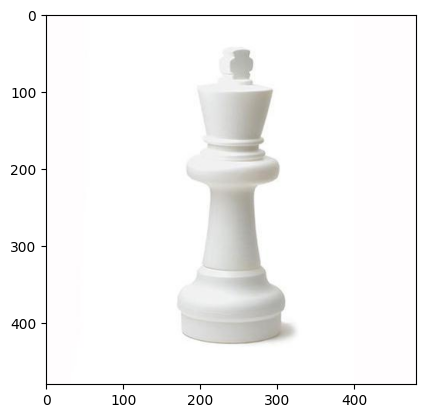

{'index': 'chess_00000019', 'question': 'what is it?', 'answer': 'King', 'image': '/9j/4AAQSkZJRgABAQEBLAEsAAD/4QBxRXhpZgAASUkqAAgAAAABAA4BAgBPAAAAGgAAAAAAAABXaGl0ZSBraW5nIC0gb25lIG9mIDEyIGRpZmZlcmVudCBjaGVzcyBwaWVjZXMuIDNEIHJlbmRlcmluZyB3aXRoIEhEUkkgbGlnaHRpbmcu/+EDJGh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC8ACTxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+CgkJPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9IiIgeG1sbnM6cGhvdG9zaG9wPSJodHRwOi8vbnMuYWRvYmUuY29tL3Bob3Rvc2hvcC8xLjAvIiB4bWxuczpJcHRjNHhtcENvcmU9Imh0dHA6Ly9pcHRjLm9yZy9zdGQvSXB0YzR4bXBDb3JlLzEuMC94bWxucy8iIHhtbG5zOkdldHR5SW1hZ2VzR0lGVD0iaHR0cDovL3htcC5nZXR0eWltYWdlcy5jb20vZ2lmdC8xLjAvIiB4bWxuczpkYz0iaHR0cDovL3B1cmwub3JnL2RjL2VsZW1lbnRzLzEuMS8iIHhtbG5zOnBsdXM9Imh0dHA6Ly9ucy51c2VwbHVzLm9yZy9sZGYveG1wLzEuMC8iIHhtbG5zOmlwdGNFeHQ9Imh0dHA6Ly9pcHRjLm9yZy9zdGQvSXB0YzR4bXBFeHQvMjAwOC0wMi0yOS8iIHBob3Rvc2hvcDpDcmVkaXQ9IkdldHR5IEltYWdlcyIgR2V0dHlJbWFnZXNHSUZUOkFzc2V0SUQ9IjE3MjE5OTk4NCIgPgo8ZGM6Y3JlYXRvcj48cmRmOlNlc

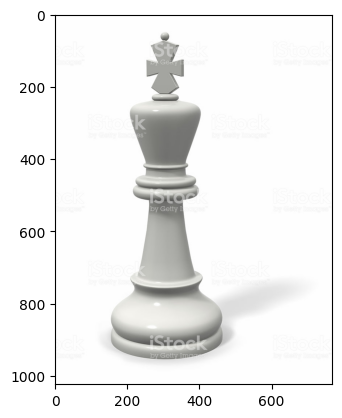

{'index': 'chess_00000049', 'question': 'what is it?', 'answer': 'Bishop', 'image': '/9j/4AAQSkZJRgABAQEASABIAAD/4Qm+aHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLwA8P3hwYWNrZXQgYmVnaW49Iu+7vyIgaWQ9Ilc1TTBNcENlaGlIenJlU3pOVGN6a2M5ZCI/PiA8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIiB4OnhtcHRrPSJYTVAgQ29yZSA0LjQuMC1FeGl2MiI+IDxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+IDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSIiIHhtbG5zOmRjPSJodHRwOi8vcHVybC5vcmcvZGMvZWxlbWVudHMvMS4xLyI+IDxkYzpjcmVhdG9yPiA8cmRmOlNlcT4gPHJkZjpsaT5WZWN0b3JTdG9jay5jb20vMTAzMDkzOTc8L3JkZjpsaT4gPC9yZGY6U2VxPiA8L2RjOmNyZWF0b3I+IDwvcmRmOkRlc2NyaXB0aW9uPiA8L3JkZjpSREY+IDwveDp4bXBtZXRhPiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICA

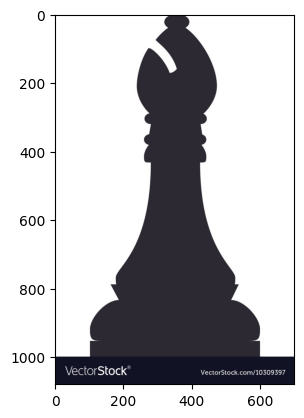

{'index': 'chess_00000145', 'question': 'what is it?', 'answer': 'Bishop', 'image': '/9j/4AAQSkZJRgABAQAASABIAAD/2wBDAAQDAwQDAwQEAwQFBAQFBgoHBgYGBg0JCggKDw0QEA8NDw4RExgUERIXEg4PFRwVFxkZGxsbEBQdHx0aHxgaGxr/2wBDAQQFBQYFBgwHBwwaEQ8RGhoaGhoaGhoaGhoaGhoaGhoaGhoaGhoaGhoaGhoaGhoaGhoaGhoaGhoaGhoaGhoaGhr/wAARCAMgBcgDASIAAhEBAxEB/8QAHQABAAICAwEBAAAAAAAAAAAAAAMEAgUBBggHCf/EAEsQAQACAQIDBQYDBAYIBAUFAQABAgMEEQUhMQYSQVFhBxMicYGRFDKhQlKxwQgVIzNi0RYkQ3KCkqLhU7LC8DRFY4PxJTdkc4Sj/8QAGQEBAQEBAQEAAAAAAAAAAAAAAAEEAgMF/8QAIREBAQACAwEBAQEBAQEAAAAAAAECEQMSITEyUUEicRP/2gAMAwEAAhEDEQA/APn4DUygAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACbS6TUa3NGHR4Mmoyz+xjrNp/R2/2a+z7N2+4rnxTe+Dh+kpF9Rlp+aZn8tK78t52n5RD0HwvsPo+zOkjTcM0eOlI/Nb9q0+cz1l55ZzHx64cdy9eVNbwfiPD4idZodTjiY35Ypt/Ddpb8W0eHLjxajNGmy5Ld3HXPWcU3nyjvRG71bxrgeTPvM4qbvlnbD2b37S6HNo8uixZsdv/ABK7w4/+lel4o+ZDs/BvZpxemWmi1s4cWHHXu0nFWd58pndoeIaDPwvXajRayvcz6e80vHrH8vF645TJ45YXFWAdOAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

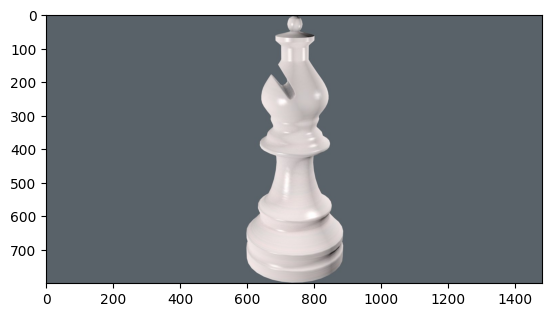

{'index': 'chess_00000014', 'question': 'what is it?', 'answer': 'Queen', 'image': '/9j/4AAQSkZJRgABAQEBLAEsAAD/4QAWRXhpZgAASUkqAAgAAAAAAAAAAAD/4QKEaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLwAJPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4KCQk8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0iIiB4bWxuczpwaG90b3Nob3A9Imh0dHA6Ly9ucy5hZG9iZS5jb20vcGhvdG9zaG9wLzEuMC8iIHhtbG5zOklwdGM0eG1wQ29yZT0iaHR0cDovL2lwdGMub3JnL3N0ZC9JcHRjNHhtcENvcmUvMS4wL3htbG5zLyIgeG1sbnM6R2V0dHlJbWFnZXNHSUZUPSJodHRwOi8veG1wLmdldHR5aW1hZ2VzLmNvbS9naWZ0LzEuMC8iIHhtbG5zOmRjPSJodHRwOi8vcHVybC5vcmcvZGMvZWxlbWVudHMvMS4xLyIgeG1sbnM6cGx1cz0iaHR0cDovL25zLnVzZXBsdXMub3JnL2xkZi94bXAvMS4wLyIgeG1sbnM6aXB0Y0V4dD0iaHR0cDovL2lwdGMub3JnL3N0ZC9JcHRjNHhtcEV4dC8yMDA4LTAyLTI5LyIgcGhvdG9zaG9wOkNyZWRpdD0iR2V0dHkgSW1hZ2VzL2lTdG9ja3Bob3RvIiBHZXR0eUltYWdlc0dJRlQ6QXNzZXRJRD0iOTQxOTE5NjQiID4KPGRjOmNyZWF0b3I+PHJkZjpTZXE+PHJkZjpsaT5GbG9vcnRqZTwvcmRmOmxpPjwvcmRmOlNlcT48L2RjOmNyZWF0b3I+CQk8L3JkZjpEZXNjcmlwdGlvbj4KCTwvcmRmOlJE

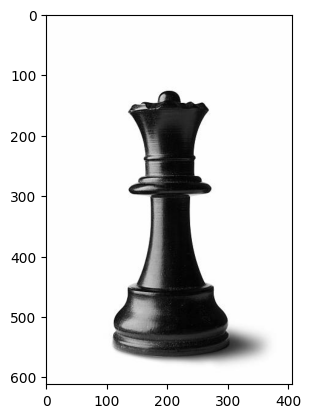

{'index': 'chess_00000076', 'question': 'what is it?', 'answer': 'Rook', 'image': '/9j/4AAQSkZJRgABAgEASABIAAD/4QiBRXhpZgAATU0AKgAAAAgABwESAAMAAAABAAEAAAEaAAUAAAABAAAAYgEbAAUAAAABAAAAagEoAAMAAAABAAMAAAExAAIAAAAUAAAAcgEyAAIAAAAUAAAAhodpAAQAAAABAAAAnAAAAMgAAAAcAAAAAQAAABwAAAABQWRvYmUgUGhvdG9zaG9wIDcuMAAyMDA2OjA2OjA0IDAzOjMzOjE3AAAAAAOgAQADAAAAAf//AACgAgAEAAAAAQAAAI6gAwAEAAAAAQAAARwAAAAAAAAABgEDAAMAAAABAAYAAAEaAAUAAAABAAABFgEbAAUAAAABAAABHgEoAAMAAAABAAIAAAIBAAQAAAABAAABJgICAAQAAAABAAAHUwAAAAAAAABIAAAAAQAAAEgAAAAB/9j/4AAQSkZJRgABAgEASABIAAD/7QAMQWRvYmVfQ00AAv/uAA5BZG9iZQBkgAAAAAH/2wCEAAwICAgJCAwJCQwRCwoLERUPDAwPFRgTExUTExgRDAwMDAwMEQwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwBDQsLDQ4NEA4OEBQODg4UFA4ODg4UEQwMDAwMEREMDAwMDAwRDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDP/AABEIAIAAQAMBIgACEQEDEQH/3QAEAAT/xAE/AAABBQEBAQEBAQAAAAAAAAADAAECBAUGBwgJCgsBAAEFAQEBAQEBAAAAAAAAAAEAAgMEBQYHCAkKCxAAAQQBAwIEAgUHBggFAwwzAQACEQMEIRIxBUFRYRMicYEyBhSRobFCIyQVUsFiMzRygtFDByWSU/Dh8WNzNRaisoMmRJNUZEXCo3Q2F9JV4mXys4TD03Xj80Ynl

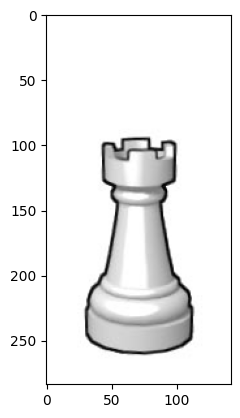

Support Counter: 10


In [2]:
import csv
import base64
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# path = "./datasets/clevr/"
# path = "./datasets/open_mi/"
# path = "./datasets/clevr/"
# path = path

# datasets_name = "Open_MI.tsv"
# datasets_name = "query.tsv"
# datasets_name = "query_herding_retrieved.tsv"
# open tsv file
csv.field_size_limit(10000000)
with open(path + datasets_name, "r", encoding="utf-8") as tsvfile:
    # 创建一个csv.reader对象，指定制表符为字段分隔符
    tsvreader = csv.reader(tsvfile, delimiter="\t")
    headers = next(tsvreader)

    row_counter = 0
    support_counter = 0
    # 遍历文件中的每一行
    for row in tsvreader:
        for header in headers:
            if header == "image":
                # print(header, ":", row[headers.index(header)])
                # print(row[headers.index(header)])
                # print(row[headers.index(header)].split(",")[1])
                # continue
                img = Image.open(BytesIO(base64.b64decode(row[headers.index(header)])))
                plt.imshow(img)
                plt.show()
            elif header =="support":
                support = eval(row[headers.index(header)])
                print("support")
                for item in support:
                    support_counter += 1
                    print(item)
                    print("Item ID:", item['index'])
                    print("Question:", item['question'])
                    print("Answer:", item['answer'])
                    img = item['image']
                    img = Image.open(BytesIO(base64.b64decode(img)))
                    plt.imshow(img)
                    plt.show()
                    
            else:
                print(header, ":", row[headers.index(header)])

        # for loop
        row_counter += 1
        if row_counter >= 1:
            break
print("Support Counter:", support_counter)

In [1]:
path = "/home/zxy/LMUData/"
datasets_name = "MME.tsv"
import csv
# Increase the field size limit
csv.field_size_limit(10000000)


with open(path + datasets_name, "r", encoding="utf-8") as tsvfile:
    # 创建一个csv.reader对象，指定制表符为字段分隔符
    tsvreader = csv.reader(tsvfile, delimiter="\t")
    row_counter = 0
    categories_set = set()
    category_count = {}
    for row in tsvreader:
        # get the index of the columns
        category_index = headers.index("category")
        # question_index = headers.index("question")
        # answer_index = headers.index("answer")
        # image_index = headers.index("image")
        # print(
        #     "category: {} \n".format(
        #         # row_counter,
        #         row[category_index],
        #         # row[question_index],
        #         # row[answer_index],
        #     )
        # )
        category = row[category_index]
        categories_set.add(category)
        if category in category_count:
            category_count[category] += 1
        else:
            category_count[category] = 1
        

    print("Total categories: ", len(categories_set))
    print(category_count)

FileNotFoundError: [Errno 2] No such file or directory: '/home/zxy/LMUData/MME.tsv'

In [31]:
import csv
import base64
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

path = "./LMUData/"
# datasets_name = "Open_MI.tsv"
datasets_name = "Open_MI.tsv.merge"
# open tsv file
csv.field_size_limit(10000000)
with open(path + datasets_name, "r", encoding="utf-8") as tsvfile:
    # 创建一个csv.reader对象，指定制表符为字段分隔符
    tsvreader = csv.reader(tsvfile, delimiter="\t")
    headers = next(tsvreader)

    row_counter = 0
    # 遍历文件中的每一行
    for row in tsvreader:
        for header in headers:
            if header == "image":
                # print(header, ":", row[headers.index(header)])
                # print(row[headers.index(header)])
                # print(row[headers.index(header)].split(",")[1])
                img = Image.open(BytesIO(base64.b64decode(row[headers.index(header)])))
                plt.imshow(img)
                plt.show()
            elif header =="support":
                support = eval(row[headers.index(header)])
                for key in support:
                    # image_base64 = support[key]['images']
                    # for img in image_base64:
                    #     img = Image.open(BytesIO(base64.b64decode(img)))
                    #     plt.imshow(img)
                    #     plt.show()
                    print(f"{key}: ---------\n ")
                    # for idx in support[key]['image_path']:
                    #     print(f"{idx}")
                    for img, img_path in zip(support[key]['image'], support[key]['image_path']):
                        img = Image.open(BytesIO(base64.b64decode(img)))
                        plt.imshow(img)
                        plt.show()
                        print(f"{img_path}")
            else:
                print(header, ":", row[headers.index(header)])

        # for loop
        row_counter += 1
        if row_counter >= 1:
            break

# Clevr dataset

In [ ]:
import csv
import base64
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import json

path = "./LMUData/"
datasets_name = "CLEVR.tsv"
datasets_name = "CLEVR_new.tsv"
# open tsv file
csv.field_size_limit(10000000)
with open(path + datasets_name, "r", encoding="utf-8") as tsvfile:
    # 创建一个csv.reader对象，指定制表符为字段分隔符
    tsvreader = csv.reader(tsvfile, delimiter="\t")
    headers = next(tsvreader)
    print(headers)
    row_counter = 0
    # 遍历文件中的每一行
    for row in tsvreader:
        for header in headers:
            if header == "image":
                # print(header, ":", row[headers.index(header)])
                # print(row[headers.index(header)])
                # print(row[headers.index(header)].split(",")[1])
                # continue
                img = Image.open(BytesIO(base64.b64decode(row[headers.index(header)])))
                plt.imshow(img)
                plt.show()
            elif header =="support":
                support = eval(row[headers.index(header)])
                print("support ---")
                for item in support:
                    for key, value in item.items():
                        if key == "image":
                            img = Image.open(BytesIO(base64.b64decode(value)))
                            plt.imshow(img)
                            plt.show()
                        else:
                            print(f"{key}: {value}")
            else:
                print(header, ":", row[headers.index(header)])

        # for loop
        row_counter += 1
        if row_counter >= 1:
            break

# operator_induction

['index', 'question', 'answer', 'operator', 'image', 'support']
index : operator_induction_query_1_1_+
question : What is the result of the following mathematical expression?
answer : 2
operator : +


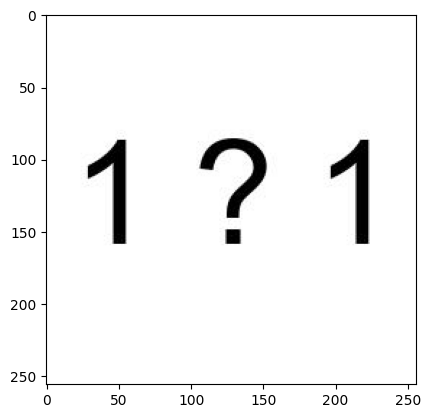

support ---
question: What is the result of the following mathematical expression?
answer: [13, 1, 42]


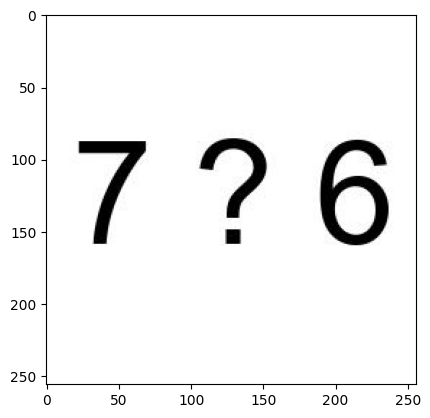

index: operator_induction_support_7_6
question: What is the result of the following mathematical expression?
answer: [8, -4, 12]


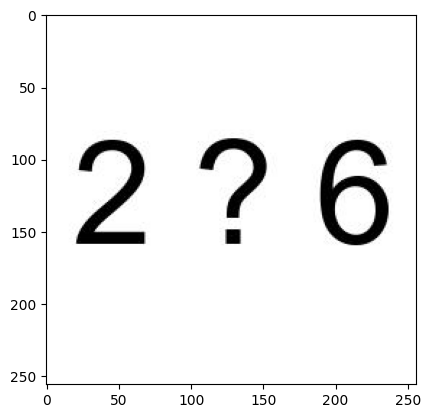

index: operator_induction_support_2_6
question: What is the result of the following mathematical expression?
answer: [12, 6, 27]


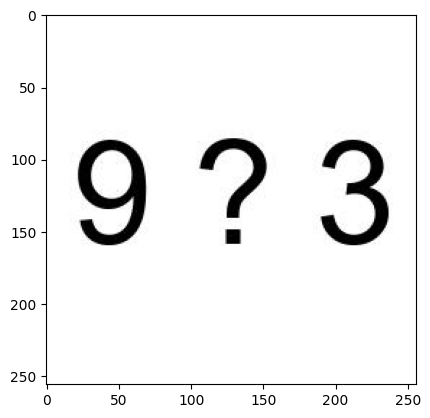

index: operator_induction_support_9_3
question: What is the result of the following mathematical expression?
answer: [11, -3, 28]


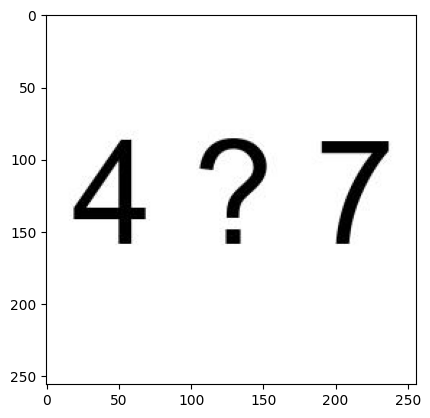

index: operator_induction_support_4_7
question: What is the result of the following mathematical expression?
answer: [11, -7, 18]


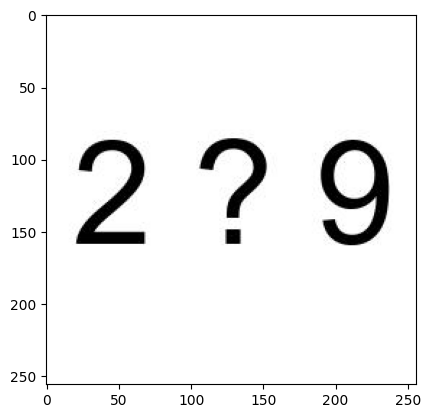

index: operator_induction_support_2_9
question: What is the result of the following mathematical expression?
answer: [11, 1, 30]


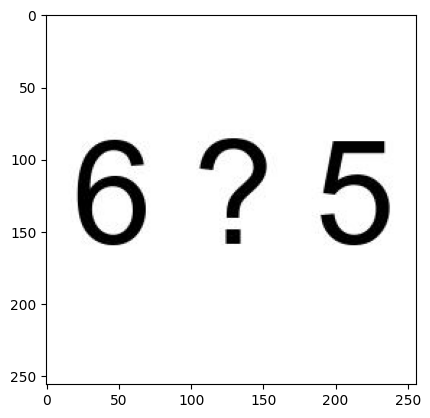

index: operator_induction_support_6_5
question: What is the result of the following mathematical expression?
answer: [5, 3, 4]


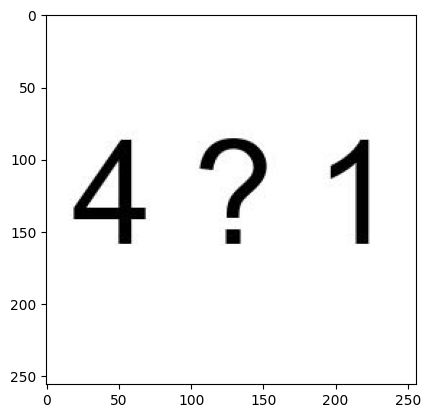

index: operator_induction_support_4_1
question: What is the result of the following mathematical expression?
answer: [13, 3, 40]


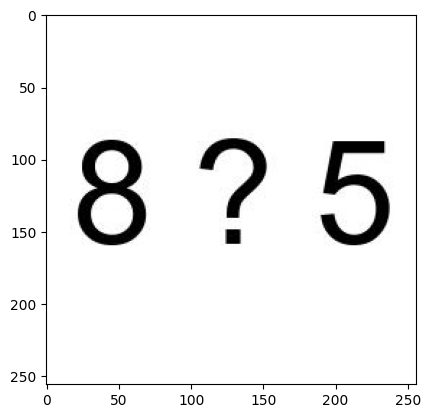

index: operator_induction_support_8_5


In [7]:
import csv
import base64
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import json

path = "./LMUData/"
# datasets_name = "CLEVR.tsv"
datasets_name = "operator_induction_new.tsv"
# open tsv file
csv.field_size_limit(10000000)
with open(path + datasets_name, "r", encoding="utf-8") as tsvfile:
    # 创建一个csv.reader对象，指定制表符为字段分隔符
    tsvreader = csv.reader(tsvfile, delimiter="\t")
    headers = next(tsvreader)
    print(headers)
    row_counter = 0
    # 遍历文件中的每一行
    for row in tsvreader:
        for header in headers:
            if header == "image":
                # print(header, ":", row[headers.index(header)])
                # print(row[headers.index(header)])
                # print(row[headers.index(header)].split(",")[1])
                # continue
                img = Image.open(BytesIO(base64.b64decode(row[headers.index(header)])))
                plt.imshow(img)
                plt.show()
            elif header =="support":
                support = eval(row[headers.index(header)])
                print("support ---")
                for item in support:
                        for key, value in item.items():
                            if key == "image":
                                img = Image.open(BytesIO(base64.b64decode(value)))
                                plt.imshow(img)
                                plt.show()
                            else:
                                print(f"{key}: {value}")
            else:
                print(header, ":", row[headers.index(header)])

        # for loop
        row_counter += 1
        if row_counter >= 1:
            break